<a href="https://colab.research.google.com/github/seyfbouraoui/Covid19_fr/blob/main/caraterisation_res.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importer les bibliothèques nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #the knn classifier
from sklearn.naive_bayes import CategoricalNB #naive bayes classifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report




In [ ]:
# Données d'entrée (caractéristiques des réservoirs) et étiquettes de classification
# Exemple de données fictives, veuillez remplacer par vos propres données
features = [[0.5, 0.2, 0.1], [0.9, 0.8, 0.3], [0.1, 0.4, 0.7], [0.7, 0.6, 0.5]]
labels = [0, 1, 1, 0]  # Exemple d'étiquettes fictives : 0 pour réservoir non pétrolier, 1 pour réservoir pétrolier

3000
2800
2600
2400
2243
2105
4200
4000
3800
3600
3400
3200
2980
2800
2600
2400
2200
4200
4000
3800
3600
3400
3200
3000
2800
2600
2400
2199
2000


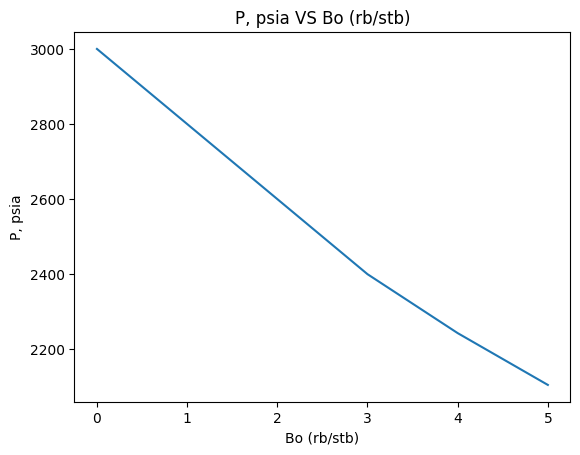

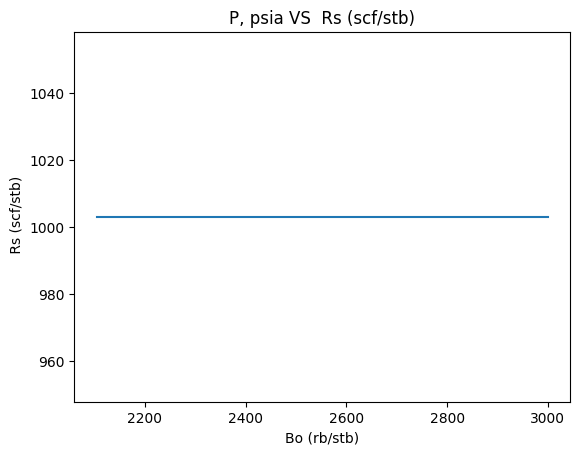

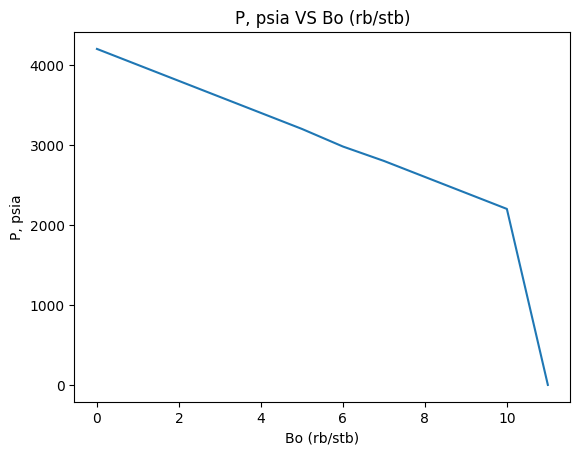

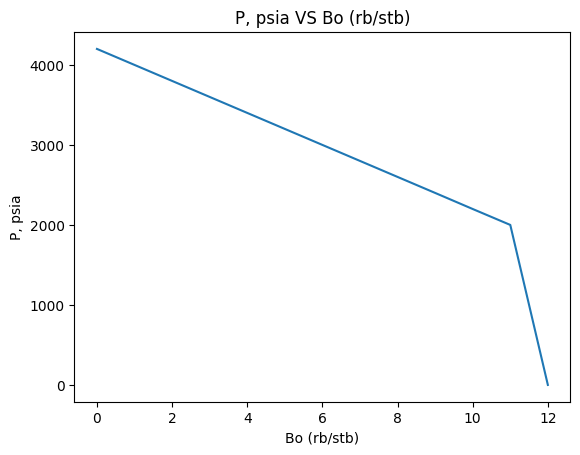

In [72]:
import csv
import  numpy as np
import matplotlib.pyplot as plt


X = []
with open('/content/sadek.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';', quotechar='|')
    for row in spamreader:
        #print(', '.join(row))
        #print(row)
        if ((row != (['P', ' psia;Bo (rb/stb); Rs (scf/stb)']) and (row != [';;']))):
            X.append(row)

P1 = X[1:7]
P2 = X[8:20]
P3 = X[21:34]

PP = np.zeros(6)
BO1 = np.zeros(6)
RS1 = np.zeros(6)
YP1 = np.zeros(6)

PP2 = np.zeros(12)
BO2 = np.zeros(12)
RS2 = np.zeros(12)
YP2 = np.zeros(12)

PP3 = np.zeros(13)
BO3 = np.zeros(13)
RS3 = np.zeros(13)
YP3 = np.zeros(13)

for i in range(0,6):
    print(P1[i][0])
    PP[i] = P1[i][0]
    BO1[i] = P1[i][1]
    RS1[i] = P1[i][2]
    YP1[i] = P1[i][3]


for i in range(0,11):
    print(P2[i][0])
    PP2[i] = P2[i][0]
    BO2[i] = P2[i][1]
    RS2[i] = P2[i][2]
    YP2[i] = P2[i][3]

for i in range(0,12):
    print(P3[i][0])
    PP3[i] = P3[i][0]
    BO3[i] = P3[i][1]
    RS3[i] = P3[i][2]
    YP3[i] = P3[i][3]

plt.plot(PP[:])
plt.title("P, psia VS Bo (rb/stb)")
plt.xlabel('Bo (rb/stb)')
plt.ylabel('P, psia')
plt.show()

plt.plot(PP[:],RS1[:])
plt.title("P, psia VS  Rs (scf/stb)")
plt.xlabel('Bo (rb/stb)')
plt.ylabel(' Rs (scf/stb)')
plt.show()

plt.plot(PP2[:])
plt.title("P, psia VS Bo (rb/stb)")
plt.xlabel('Bo (rb/stb)')
plt.ylabel('P, psia')
plt.show()

plt.plot(PP3[:])
plt.title("P, psia VS Bo (rb/stb)")
plt.xlabel('Bo (rb/stb)')
plt.ylabel('P, psia')
plt.show()

X = PP2
y = YP2


Accuracy: 0.6666666666666666


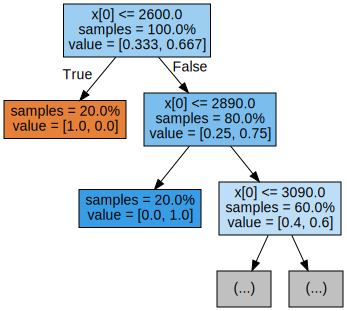

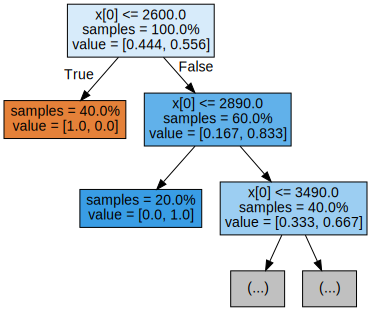

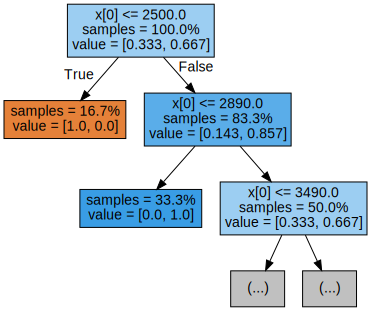

In [73]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


# Split the data into features (X) and target (y)
#X = PP
#y = [0,0,1,1,0,0]


#X = PP
#y = YP1

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

rf = RandomForestClassifier()


rf.fit(X_train.reshape(-1, 1), y_train)

y_pred = rf.predict(X_test.reshape(-1, 1))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree, filled=True, max_depth=2, impurity=False, proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

